## Валентин Левченко, БПМ143
## Вариант 6

Зона 2 границы детали 𝐹 закреплена, а зона 1 равномерно нагружена усилием 𝑃 (Н/см2) под
углом 0∘. Деталь задана следующими размерами: 𝐿,𝐻,𝑊,𝑅 = 15, 5, 2, 7 см и толщиной 𝑡 = 1
см. При условии сохранения упругости деформации определить наибольшую величину усилия 𝑃,
если деталь изготовлена из стали №1.

In [1995]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import scipy.spatial
import math
np.set_printoptions(precision = 3)
%matplotlib inline

In [1996]:
# постоянные
E = 2e7 # Н/см^2 (модуль упругости Юнга)
sigT = 3e4 # предел текучести при растяжении 
mu = 0.3   # коэффициент Пуассона

In [1997]:
# параметры
L = 15
H = 5
W = 2
R = 7
P = 1e5    # усилие
t = 1      # толщина

In [1998]:
k = np.sqrt(R ** 2 - (R - (H - W) / 2) ** 2)
k

4.3301270189221936

In [1999]:
N1 = 10
Brd1_x = np.linspace(0, L / 2 - k, N1)
Brd1_y = np.zeros(N1)

N2 = 20
#alpha = np.radians(np.linspace(-180 + beta, -beta, N2))
alpha = np.radians(np.linspace(- np.rad2deg(np.pi / 2) - np.rad2deg(np.arccos((R - (H - W) / 2) / R)), - np.rad2deg(np.pi / 2) + np.rad2deg(np.arccos((R - (H - W) / 2) / R)), N2))
Brd2_x = L / 2 + R * np.cos(alpha)
Brd2_y = (H - W) / 2 - R - R * np.sin(alpha)

N3 = 10
Brd3_x = np.linspace(L / 2 + k, L, N3)
Brd3_y = np.zeros(N1)

N4 = 10
Brd4_x = np.zeros(N4) + L
Brd4_y = np.linspace(0, H, N4)

N5 = 10
Brd5_x = np.linspace(15, L / 2 + k, N3)
Brd5_y = np.zeros(N1) + H

N6 = 20
#alpha = np.radians(np.linspace(beta, 180 - beta, N2))
alpha = np.radians(np.linspace(np.rad2deg(np.pi / 2) - np.rad2deg(np.arccos((R - (H - W) / 2) / R)), np.rad2deg(np.pi / 2) + np.rad2deg(np.arccos((R - (H - W) / 2) / R)), N2))
Brd6_x =  L / 2 + R * np.cos(alpha) 
Brd6_y = H + R - (H - W) / 2 - R * np.sin(alpha) 

N7 = 10
Brd7_x = np.linspace(L / 2 - k, 0, N7)
Brd7_y = np.zeros(N1) + H

N8 = 10
Brd8_x = np.zeros(N4)
Brd8_y = np.linspace(H, 0, N4)

In [2000]:
Brd = np.vstack((np.vstack((Brd1_x[:-1], Brd1_y[:-1])).T,
                 np.vstack((Brd2_x[:-1], Brd2_y[:-1])).T,
                 np.vstack((Brd3_x[:-1], Brd3_y[:-1])).T,
                 np.vstack((Brd4_x[:-1], Brd4_y[:-1])).T,
                 np.vstack((Brd5_x[:-1], Brd5_y[:-1])).T,
                 np.vstack((Brd6_x[:-1], Brd6_y[:-1])).T,
                 np.vstack((Brd7_x[:-1], Brd7_y[:-1])).T,
                 np.vstack((Brd8_x[:-1], Brd8_y[:-1])).T))
Brd.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\displayhook.py:272: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


(92, 2)

(-0.75, 15.75, -0.25000000000000094, 5.25)

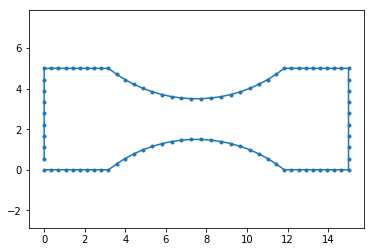

In [2001]:
plt.plot(Brd[:, 0], Brd[:, 1], '.-')
plt.axis('equal')
#plt.xlim(-1, 9)

(-0.75, 15.75, -0.25, 5.25)

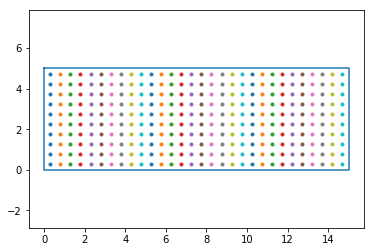

In [2002]:
delta = 0.3
x = np.linspace(0 + delta, L - delta, 30)
y = np.linspace(0 + delta, H - delta, 10)
X, Y = np.meshgrid(x, y)
plt.plot(X, Y, '.')
plt.plot([0, L, L, 0, 0], [H, H, 0, 0, H])
plt.axis('equal')

In [2003]:
XY = np.vstack((X.ravel(), Y.ravel())).T

In [2004]:
Mask1 = np.linalg.norm(XY - np.array([L / 2, - (R - (H - W) / 2)]), axis = 1) > R

In [2005]:
Mask2 = np.linalg.norm(XY - np.array([L / 2, - (R - (H - W) / 2) + W + 2 * R]), axis = 1) > R

In [2006]:
Mask3 = np.logical_not((XY[:, 0] > L) & (XY[:, 1] > H ))

In [2007]:
XY1 = XY[Mask1 & Mask2 & Mask3]
XY1.shape

(228, 2)

In [2008]:
Nodes = np.vstack((Brd, XY1))

(-0.75, 15.75, -0.25000000000000094, 5.25)

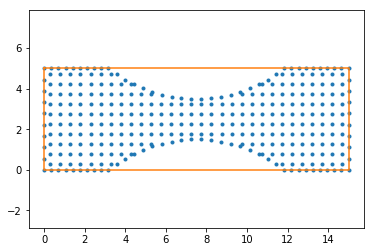

In [2009]:
plt.plot(Nodes[:, 0], Nodes[:, 1], '.')
plt.plot([0, L, L, 0, 0], [H, H, 0, 0, H])
plt.axis('equal')

In [2010]:
tri = scipy.spatial.Delaunay(Nodes)
tri

In [2011]:
Elems = tri.simplices.copy()
Elems

array([[ 88,  89, 146],
       [ 43, 265,  42],
       [124,  89,  90],
       ..., 
       [268, 290, 267],
       [290, 307, 289],
       [290, 308, 307]], dtype=int32)

(-0.75, 15.75, -0.25000000000000094, 5.25)

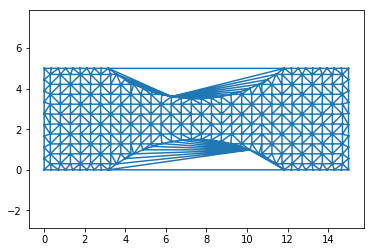

In [2012]:
plt.triplot(Nodes[:, 0], Nodes[:, 1], Elems)
plt.axis('equal')

In [2013]:
ElemC = Nodes[Elems]

In [2014]:
C = np.mean(ElemC, axis = 1)

In [2015]:
Mask1 = np.linalg.norm(C - np.array([L / 2, - (R - (H - W) / 2)]), axis = 1) > R

In [2016]:
Mask2 = np.linalg.norm(C - np.array([L / 2, - (R - (H - W) / 2) + W + 2 * R]), axis = 1) > R

In [2017]:
Mask3 = np.logical_not((C[:, 0] > L) & (C[:, 1] > H))

In [2018]:
Elems = Elems[Mask1 & Mask2 & Mask3]

In [2019]:
ElemC = Nodes[Elems]

(-0.75, 15.75, -0.25000000000000094, 5.25)

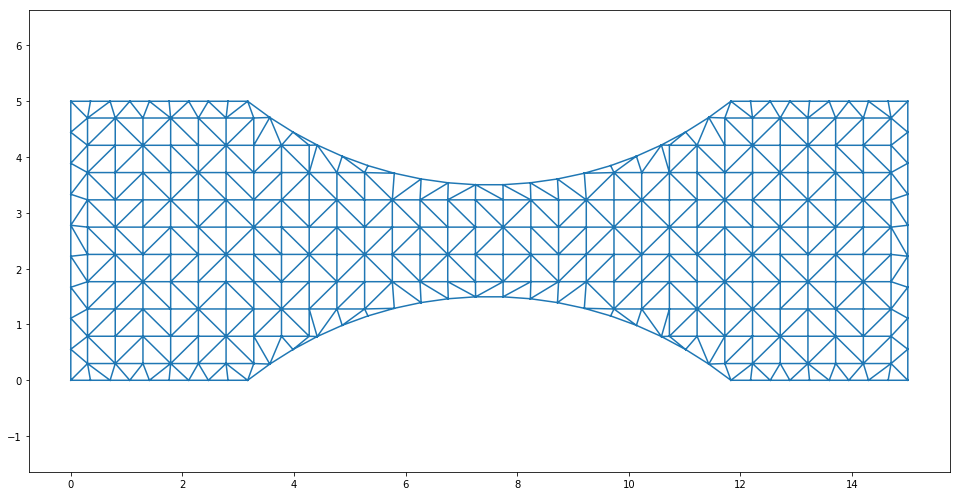

In [2020]:
plt.gcf().set_size_inches(16.5, 8.5)
plt.triplot(Nodes[:, 0], Nodes[:, 1], Elems)
plt.axis('equal')
#plt.xlim((-1,16))
#plt.ylim((-1,5))

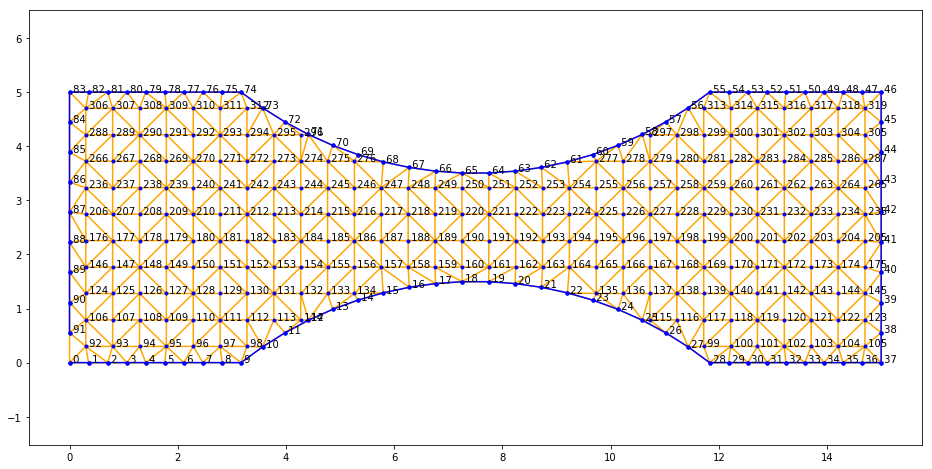

In [2021]:
def draw_elems(Nodes, Elems, *nodeArr):
    plt.figure(figsize = (16, 8))
    Nodes = np.asarray(Nodes)
    plt.triplot(Nodes[:, 0], Nodes[:, 1], Elems, color = 'orange')
    plt.plot(Nodes[:, 0], Nodes[:, 1], '.', color = 'blue')
    for nodes in nodeArr:
        nodes = np.asarray(nodes)
        plt.plot(nodes[:, 0], nodes[:, 1], '.', color = 'blue')
    for ni,n in enumerate(Nodes):
        plt.text(n[0], n[1], ' %d' % ni, fontsize = 10, rotation = 0)
    
    plt.plot(Brd[:,0], Brd[:,1], '.-', color = 'blue')
    plt.axis('equal')
    
draw_elems(Nodes, Elems, Brd)

### Определение минимальной силы p

In [2022]:
# граничные узлы с нулевыми перемещениями по обеим
# степеням свободы
bc_fix = np.array(list(range(37, 47)))
bc_fix

array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [2023]:
# степени свободы с нулевыми перемещениями
#dof = np.hstack((bc_fix*2, bc_fix*2+1, bc_sym*2+1))
#dof = np.hstack((bc_fix*2))
dof = np.hstack((bc_fix * 2, bc_fix * 2 + 1))

In [2024]:
# функция для вычисления площади элементов
def triarea(a, b, c):
    ab = b - a
    ac = c - a
    return 0.5 * (ab[:, 0] *ac[:, 1] - ab[:, 1] * ac[:, 0])

In [2025]:
ElemA = triarea(ElemC[:, 0], ElemC[:, 1], ElemC[:, 2]).reshape(-1, 1)
ElemA.shape

(546, 1)

In [2026]:
b = ElemC[:, [1, 2, 0], 1] - ElemC[:, [2, 0, 1], 1]
b.shape

(546, 3)

In [2027]:
c = ElemC[:, [2, 0, 1], 0] - ElemC[:, [1, 2, 0], 0]

In [2028]:
coef = 1 / (2 * ElemA)
z = np.zeros_like(b[:,0])
B1 = np.stack((b[:,0], z, b[:,1], z, b[:,2], z), axis = 1) * coef[:, [0] * 6]
B2 = np.stack((z, c[:,0], z, c[:,1], z, c[:,2]), axis = 1) * coef[:, [0] * 6]
B3 = np.roll(B1,1) + np.roll(B2,-1)
B = np.stack((B1, B2, B3), axis = 1) #/(2*ElemA.reshape(-1,1,1))
B.shape

(546, 3, 6)

In [2029]:
D = E / (1 - mu ** 2) * np.array([[1, mu, 0], [mu, 1, 0], [0, 0, (1 - mu) / 2]])
D

array([[ 21978021.978,   6593406.593,         0.   ],
       [  6593406.593,  21978021.978,         0.   ],
       [        0.   ,         0.   ,   7692307.692]])

In [2030]:
BT = np.transpose(B, axes = (0, 2, 1))
BT.shape

(546, 6, 3)

In [2031]:
coef = t * ElemA
Ke = np.matmul(np.matmul(BT, D), B) * coef[:, [[0] * 6] * 6]#(t*ElemA.reshape(-1,1,1))
Ke.shape

(546, 6, 6)

In [2032]:
EFT = 2 * Elems[:, [0, 0, 1, 1, 2, 2]] + np.array([0, 1, 0, 1, 0, 1])
EFT

array([[176, 177, 178, 179, 292, 293],
       [ 86,  87, 530, 531,  84,  85],
       [248, 249, 178, 179, 180, 181],
       ..., 
       [536, 537, 580, 581, 534, 535],
       [580, 581, 614, 615, 578, 579],
       [580, 581, 616, 617, 614, 615]])

In [2033]:
Nn = Nodes.shape[0]
Ne = Elems.shape[0]
Nn, Ne

(320, 546)

In [2034]:
EFT[0, :]

array([176, 177, 178, 179, 292, 293])

In [2035]:
K = np.zeros((Nn * 2, Nn * 2))
for i in range(Ne):
    EFTe = EFT[i].reshape(1, -1)
    K[EFTe.T, EFTe] += Ke[i]

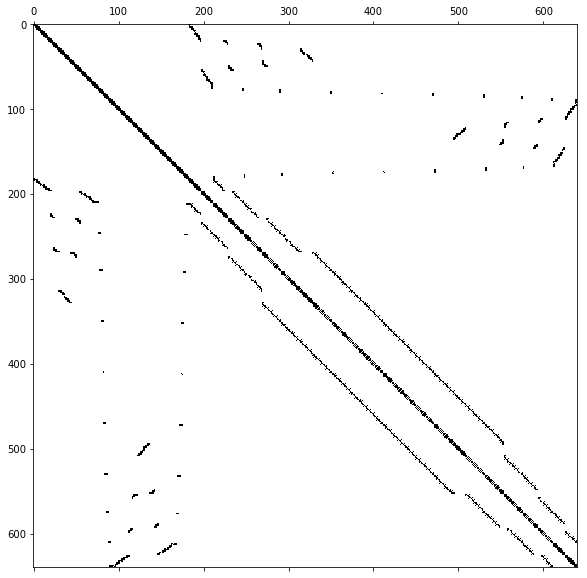

In [2036]:
plt.figure(figsize = (20, 10))
plt.spy(K)

(-0.75, 15.75, -0.25000000000000094, 5.25)

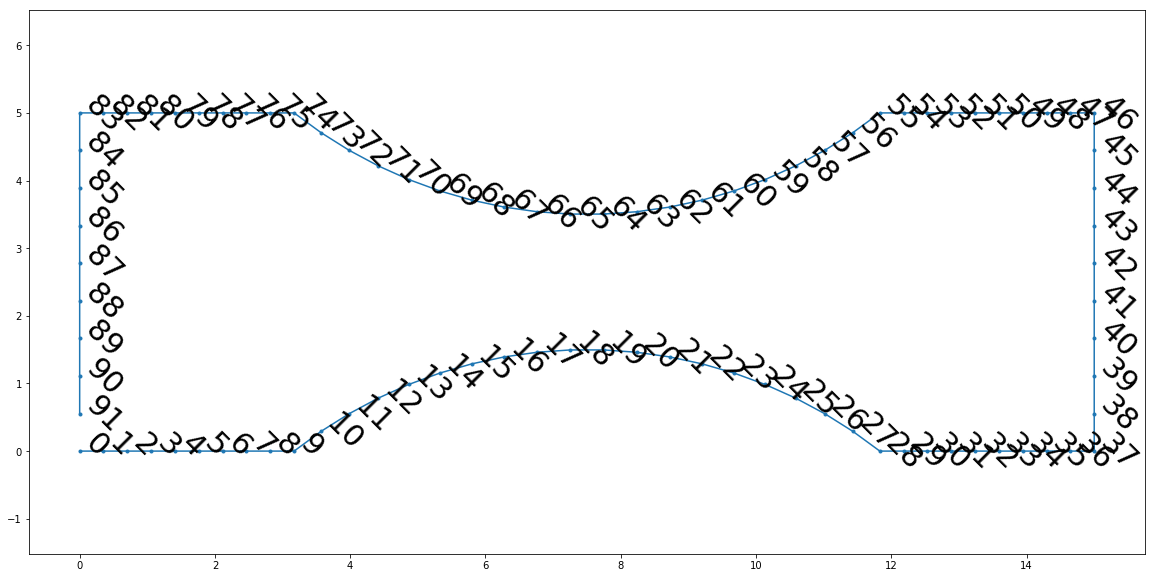

In [2037]:
plt.figure(figsize = (20, 10))
plt.plot(Brd[:,0], Brd[:,1], '.-')
for ni, n in enumerate(Brd):
    plt.text(n[0], n[1], '%d' % ni, fontsize = 30, rotation = -45)
plt.axis('equal')

###############################

In [2038]:
# степени свободы с нулевыми перемещениями
dof = np.hstack((bc_fix * 2, bc_fix * 2 + 1))

In [2039]:
bc_p = np.array(list(range(83, 92)) + [0])
bc_p

array([83, 84, 85, 86, 87, 88, 89, 90, 91,  0])

In [2040]:
F = np.zeros(Nn * 2)

- занулить в матрице K строки с номерами dof[i]
- занулить  в матрице K столбцы с номерами dof[i]
- в матрице K поставить 1 на диагональ в позициях (dof[i], dof[i])
- занулить элементы вектора F с номерами dof[i]

In [2041]:
K[dof, :] = 0
K[:, dof] = 0
K[dof, dof] = 1
F[dof] = 0

In [2042]:
# длина ребер, к которым приложено усилие
L_p = H/len(bc_p)
L_p

0.5

In [2043]:
#alpha = np.deg2rad(0)
F[bc_p * 2] = - L_p * t * P
F[bc_p[[0, -1]] * 2] *= 0.5 #усилия для крайних узлов

In [2044]:
# решение системы линейных уравнений K*U=F
U = np.linalg.solve(K, F)

In [2075]:
maxU = np.max(np.abs(U))
maxU

0.10430637867342832

In [2076]:
scale = maxU *  # масштаб
resNodes = Nodes + scale * U.reshape(-1,2) # смещенные узлы

(-0.76142381166356288, 15.750543991031599, -0.25000000000000094, 5.25)

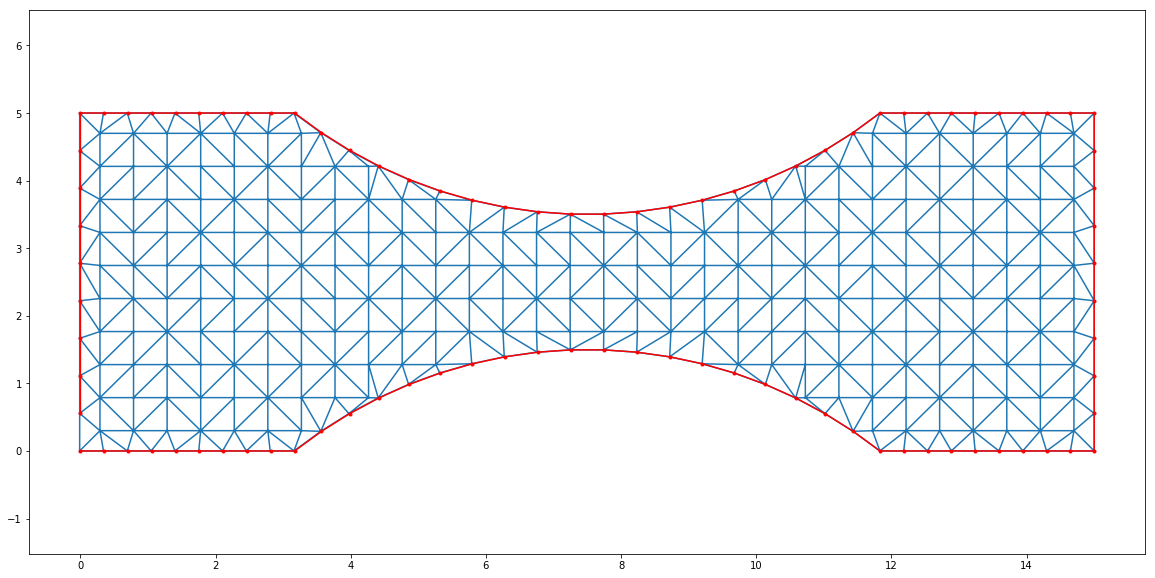

In [2077]:
plt.figure(figsize = (20, 10))
plt.plot(Brd[:, 0], Brd[:, 1], '.-r')
plt.triplot(resNodes[:, 0], resNodes[:, 1], Elems)
plt.axis('equal')

In [2048]:
ElemU = U[EFT, np.newaxis]
ElemU.shape

(546, 6, 1)

In [2049]:
ElemEps = np.matmul(B, ElemU)
ElemEps.shape

(546, 3, 1)

In [2050]:
ElemSig = np.matmul(D, ElemEps)
ElemSig.shape

(546, 3, 1)

In [2051]:
NodeSig = np.zeros((Nn, 3))
NodeA = np.zeros(Nn)
for i in range(Ne):
    NodeSig[Elems[i]] += ElemSig[i].T * ElemA[i]
    NodeA[Elems[i]] += ElemA[i]
NodeSig /= NodeA.reshape(-1,1)

(-11.702169760709973,
 16.271531893367147,
 -0.250000000000001,
 5.2500000000000009)

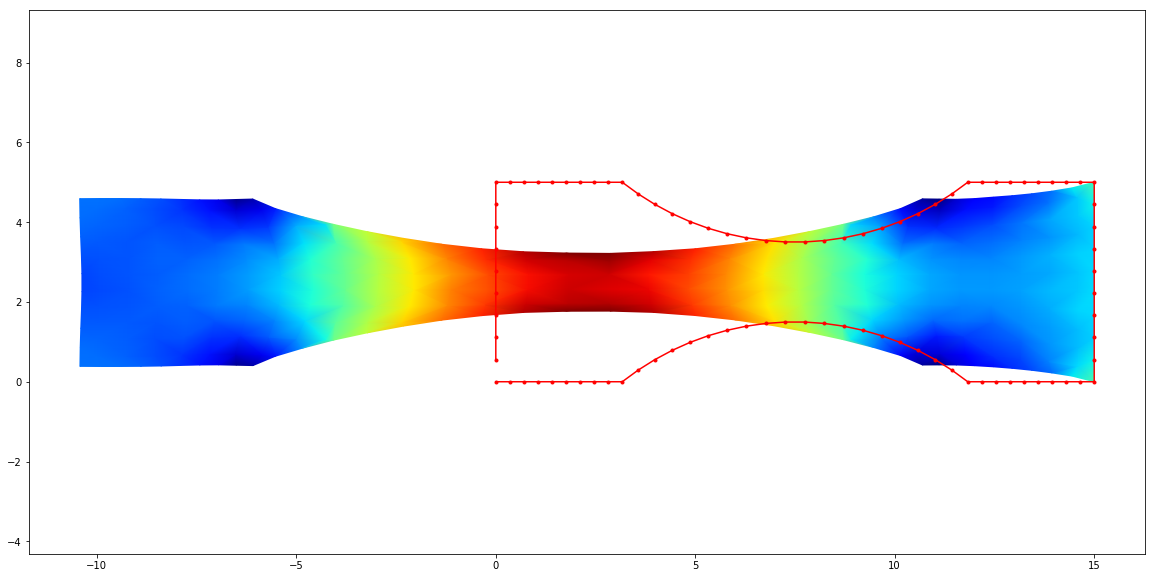

In [2052]:
plt.figure(figsize = (20, 10))
plt.tripcolor(resNodes[:, 0], resNodes[:, 1], Elems, 
              NodeSig[:, 0] + NodeSig[:, 1], 
              shading = 'gouraud', cmap = 'jet')
plt.plot(Brd[:,0], Brd[:,1], '.-r')
plt.axis('equal')

In [2053]:
S1 = 0.5*(NodeSig[:,0] + NodeSig[:,1]) + np.sqrt((0.5*(NodeSig[:,0]-NodeSig[:,1]))**2+NodeSig[:,2]**2)

(-11.702169760709973,
 16.271531893367147,
 -0.250000000000001,
 5.2500000000000009)

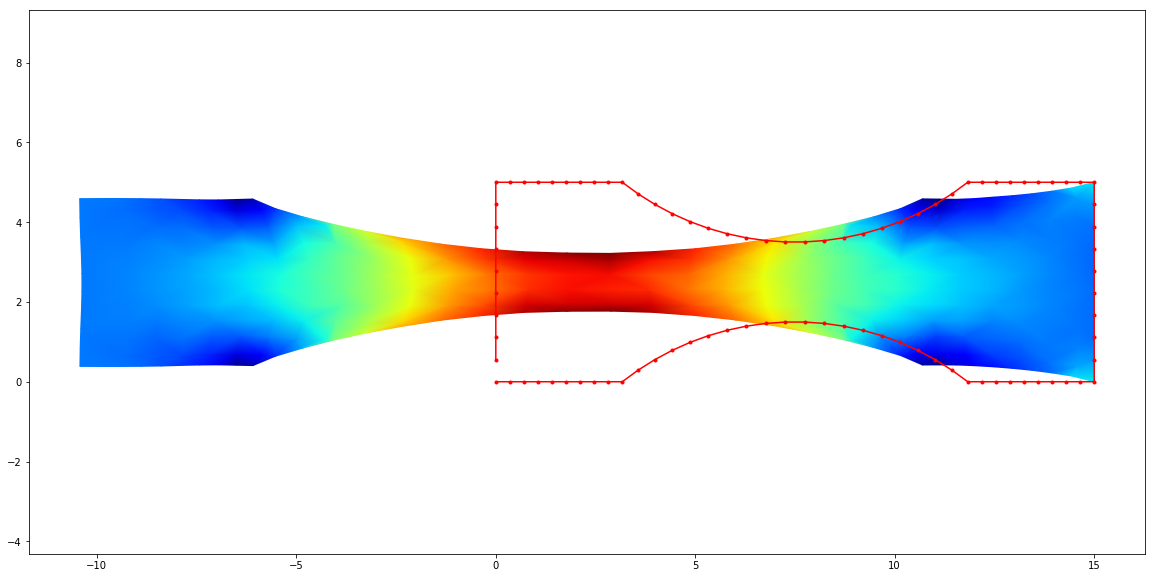

In [2054]:
plt.figure(figsize = (20, 10))
plt.tripcolor(resNodes[:, 0], resNodes[:, 1], Elems, 
              S1, 
              shading = 'gouraud', cmap = 'jet')
plt.plot(Brd[:,0], Brd[:,1], '.-r')
plt.axis('equal')

In [2055]:
Max = np.max(np.abs(S1))
Max

236833.52119950089

In [2056]:
import scipy.optimize

def goal(L, H, R, delta, t, mu, p, alpha, sigT):
    return (Max - sigT)**2

In [2057]:
g = lambda p : goal(L, H, R, 0.1, t, 0.3, P, alpha, sigT) # превратили в ф-ю от 1й переменной
p = scipy.optimize.fminbound(g, 0, 1000) # получаем оптимальную силу p

In [2058]:
p

999.99997004668103

In [2059]:
S1[0]

89747.571452577075

In [2068]:
def max_s1(L, H, r, delta, t, mu, p, alpha, sigT):
    
    N1 = 10
    Brd1_x = np.linspace(0, L / 2 - k, N1)
    Brd1_y = np.zeros(N1)

    N2 = 20
    #alpha = np.radians(np.linspace(-180 + beta, -beta, N2))
    alpha = np.radians(np.linspace(- np.rad2deg(np.pi / 2) - np.rad2deg(np.arccos((R - (H - W) / 2) / R)), - np.rad2deg(np.pi / 2) + np.rad2deg(np.arccos((R - (H - W) / 2) / R)), N2))
    Brd2_x = L / 2 + R * np.cos(alpha)
    Brd2_y = (H - W) / 2 - R - R * np.sin(alpha)

    N3 = 10
    Brd3_x = np.linspace(L / 2 + k, L, N3)
    Brd3_y = np.zeros(N1)

    N4 = 10
    Brd4_x = np.zeros(N4) + L
    Brd4_y = np.linspace(0, H, N4)

    N5 = 10
    Brd5_x = np.linspace(15, L / 2 + k, N3)
    Brd5_y = np.zeros(N1) + H

    N6 = 20
    #alpha = np.radians(np.linspace(beta, 180 - beta, N2))
    alpha = np.radians(np.linspace(np.rad2deg(np.pi / 2) - np.rad2deg(np.arccos((R - (H - W) / 2) / R)), np.rad2deg(np.pi / 2) + np.rad2deg(np.arccos((R - (H - W) / 2) / R)), N2))
    Brd6_x =  L / 2 + R * np.cos(alpha) 
    Brd6_y = H + R - (H - W) / 2 - R * np.sin(alpha) 

    N7 = 10
    Brd7_x = np.linspace(L / 2 - k, 0, N7)
    Brd7_y = np.zeros(N1) + H

    N8 = 10
    Brd8_x = np.zeros(N4)
    Brd8_y = np.linspace(H, 0, N4)

    Brd = np.vstack((np.vstack((Brd1_x[:-1], Brd1_y[:-1])).T,
                 np.vstack((Brd2_x[:-1], Brd2_y[:-1])).T,
                 np.vstack((Brd3_x[:-1], Brd3_y[:-1])).T,
                 np.vstack((Brd4_x[:-1], Brd4_y[:-1])).T,
                 np.vstack((Brd5_x[:-1], Brd5_y[:-1])).T,
                 np.vstack((Brd6_x[:-1], Brd6_y[:-1])).T,
                 np.vstack((Brd7_x[:-1], Brd7_y[:-1])).T,
                 np.vstack((Brd8_x[:-1], Brd8_y[:-1])).T))

    delta = 0.3
    x = np.linspace(0 + delta, L - delta, 30)
    y = np.linspace(0 + delta, H - delta, 10)
    X, Y = np.meshgrid(x, y)

    XY = np.vstack((X.ravel(), Y.ravel())).T
    Mask1 = np.linalg.norm(XY - np.array([L / 2, - (R - (H - W) / 2)]), axis = 1) > R
    Mask2 = np.linalg.norm(XY - np.array([L / 2, - (R - (H - W) / 2) + W + 2 * R]), axis = 1) > R
    Mask3 = np.logical_not((XY[:, 0] > L) & (XY[:, 1] > H ))
    XY1 = XY[Mask1 & Mask2 & Mask3]
    
    Nodes = np.vstack((Brd, XY1))
    
    tri = scipy.spatial.Delaunay(Nodes)
    Elems = tri.simplices.copy()
    
    ElemC = Nodes[Elems]
    
    C = np.mean(ElemC, axis = 1)
    Mask1 = np.linalg.norm(C - np.array([L / 2, - (R - (H - W) / 2)]), axis = 1) > R
    Mask2 = np.linalg.norm(C - np.array([L / 2, - (R - (H - W) / 2) + W + 2 * R]), axis = 1) > R
    Mask3 = np.logical_not((C[:, 0] > L) & (C[:, 1] > H))
    Elems = Elems[Mask1 & Mask2 & Mask3]
    ElemC = Nodes[Elems]

    bc_fix = np.array(list(range(37, 47)))
    dof = np.hstack((bc_fix * 2, bc_fix * 2 + 1))
    ElemA = triarea(ElemC[:, 0], ElemC[:, 1], ElemC[:, 2]).reshape(-1, 1)
    b = ElemC[:, [1, 2, 0], 1] - ElemC[:, [2, 0, 1], 1]
    c = ElemC[:, [2, 0, 1], 0] - ElemC[:, [1, 2, 0], 0]
    
    coef = 1 / (2 * ElemA)
    z = np.zeros_like(b[:,0])
    B1 = np.stack((b[:,0], z, b[:,1], z, b[:,2], z), axis = 1) * coef[:, [0] * 6]
    B2 = np.stack((z, c[:,0], z, c[:,1], z, c[:,2]), axis = 1) * coef[:, [0] * 6]
    B3 = np.roll(B1,1) + np.roll(B2,-1)
    B = np.stack((B1, B2, B3), axis = 1)

    D = E / (1 - mu ** 2) * np.array([[1, mu, 0], [mu, 1, 0], [0, 0, (1 - mu) / 2]])
    BT = np.transpose(B, axes = (0, 2, 1))

    coef = t * ElemA
    Ke = np.matmul(np.matmul(BT, D), B) * coef[:, [[0] * 6] * 6]#(t*ElemA.reshape(-1,1,1))
    
    EFT = 2 * Elems[:, [0, 0, 1, 1, 2, 2]] + np.array([0, 1, 0, 1, 0, 1])
    
    Nn = Nodes.shape[0]
    Ne = Elems.shape[0]
    
    K = np.zeros((Nn * 2, Nn * 2))
    for i in range(Ne):
        EFTe = EFT[i].reshape(1, -1)
        K[EFTe.T, EFTe] += Ke[i]
    
    dof = np.hstack((bc_fix * 2, bc_fix * 2 + 1))
    bc_p = np.array(list(range(83, 92)) + [0])
    
    K[dof, :] = 0
    K[:, dof] = 0
    K[dof, dof] = 1
    F[dof] = 0
    
    L_p = H/len(bc_p)
    F[bc_p * 2] = - L_p * t * p
    F[bc_p[[0, -1]] * 2] *= 0.5
    
    U = np.linalg.solve(K, F)
    np.max(np.abs(U))
    
    scale = 100 # масштаб
    resNodes = Nodes + scale * U.reshape(-1,2) # смещенные узлы
    
    ElemU = U[EFT, np.newaxis]
    ElemEps = np.matmul(B, ElemU)
    ElemSig = np.matmul(D, ElemEps)
    
    NodeSig = np.zeros((Nn, 3))
    NodeA = np.zeros(Nn)
    for i in range(Ne):
        NodeSig[Elems[i]] += ElemSig[i].T * ElemA[i]
        NodeA[Elems[i]] += ElemA[i]
    NodeSig /= NodeA.reshape(-1,1)
    
    S1 = 0.5*(NodeSig[:,0] + NodeSig[:,1]) + np.sqrt((0.5*(NodeSig[:,0]-NodeSig[:,1]))**2+NodeSig[:,2]**2)
    return np.max(np.abs(S1) - sigT) ** 2 


In [2071]:
import scipy.optimize

g = lambda p : max_s1(L, H, R, 0.1, t, 0.3, p, alpha, sigT) # превратили в ф-ю от 1й переменной
p = scipy.optimize.fminbound(g, 0, 1e10) # получаем оптимальную силу p
p

12667.125771750842

(-11.702169760709973, 16.27153189336714, -0.25, 5.25)

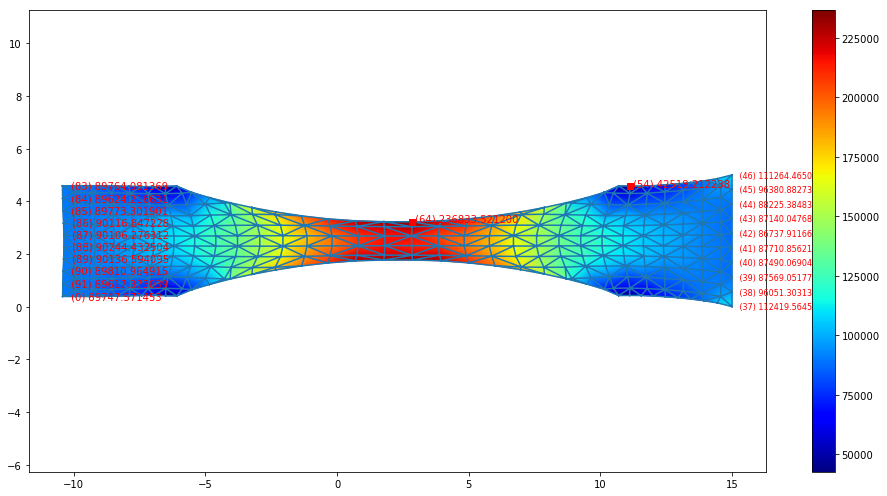

In [2074]:
plt.gcf().set_size_inches(16.5, 8.5) 
plt.tripcolor(resNodes[:, 0], resNodes[:, 1], Elems, 
                S1, 
                shading='gouraud', cmap='jet') 
plt.triplot(resNodes[:,0], resNodes[:,1], Elems) 
plt.colorbar() 

# Отображением максимальное значение главных напряжений 
maxIndex = list(S1).index(max(S1)) 
plt.plot(resNodes[maxIndex, 0], resNodes[maxIndex, 1], 's', color='red') 
plt.text(resNodes[maxIndex, 0], resNodes[maxIndex, 1], ' (%d) %.6f' % (maxIndex, S1[maxIndex]), fontsize=10, color='red') 

#минимальное значение главных напряжений 
minIndex = list(S1).index(min(S1)) 
plt.plot(resNodes[minIndex, 0], resNodes[minIndex, 1], 's', color='red') 
plt.text(resNodes[minIndex, 0], resNodes[minIndex, 1], ' (%d) %.6f' % (minIndex, S1[minIndex]), fontsize=10, color='red') 

#значение главного напряжения при растяжении 
plt.text(resNodes[0, 0] + 0.2, resNodes[0, 1] - 0.1, ' (%d) %.6f' % (0, S1[0]), fontsize=10, color='red') 

#значение главного напряжения на фиксированной границе 
N = len(bc_fix) 
#ind = (int)((N-1)/2)*2 + 2*(N-1) 
#plt.text(resNodes[ind, 0] + 0.2, resNodes[ind, 1] - 0.1, ' (%d) %.6f' % (ind, S1[ind]), fontsize=10, color='black') 

for i in range(83, 92): 
    plt.text(resNodes[i, 0] + 0.2, resNodes[i, 1] - 0.1, ' (%d) %.6f' % (i, S1[i]), fontsize=10,rotation = 0, color='r') 
for i in range(37, 47): 
    plt.text(resNodes[i, 0] + 0.2, resNodes[i, 1] - 0.1, ' (%d) %.6f' % (i, S1[i]), fontsize=8,rotation = 0, color='r') 
plt.axis('equal')

In [2067]:
g(2000)

42780105491.784386

In [2062]:
R - (H - W) / 2

5.5

In [2063]:
- np.rad2deg(np.pi / 2) + np.rad2deg(np.arccos((R - (H - W) / 2) / R))

-51.786789298261809

In [2064]:
- np.rad2deg(np.pi / 2 )

-90.0

In [2065]:
- np.rad2deg(np.pi / 2)- np.rad2deg(np.arccos((R - (H - W) / 2) / R))

-128.21321070173821